In [4]:
import pandas as pd
import os

In [11]:
df = pd.read_csv('data/Sales_Data/Sales_April_2019.csv')
df.shape

(18383, 6)

In [12]:
files  = [file for file in os.listdir('data/Sales_Data/')]

In [7]:
data = pd.DataFrame()

In [8]:
for f in files:
    file = pd.read_csv('data/Sales_Data/'+f)
    data = pd.concat([data, file])

In [9]:
data.shape

(186850, 6)

In [19]:
data['month'] = data['Order Date'].str[0:2]

In [21]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [25]:
nan_df = data[data.isna().any(axis=1)]
nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 264 to 13352
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
 6   month             0 non-null      object
dtypes: object(7)
memory usage: 34.1+ KB


In [26]:
data = data.dropna()

In [29]:
data.shape

(186305, 7)

In [36]:
data = data[data['month'].str[0:2] != 'Or']

In [37]:
data['month'].astype('int')

0        12
1        12
2        12
3        12
4        12
         ..
13617     6
13618     6
13619     6
13620     6
13621     6
Name: month, Length: 185950, dtype: int64

In [39]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])

/var/folders/f7/1t0gd_nj48d85_3rv7fqxdbh0000gn/T/ipykernel_79815/469592863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])


In [40]:
data['Price Each'] = pd.to_numeric(data['Price Each'])

/var/folders/f7/1t0gd_nj48d85_3rv7fqxdbh0000gn/T/ipykernel_79815/2423482382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each'] = pd.to_numeric(data['Price Each'])


In [41]:
data['Sales'] = data['Price Each'] * data['Quantity Ordered']

/var/folders/f7/1t0gd_nj48d85_3rv7fqxdbh0000gn/T/ipykernel_79815/958814425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Price Each'] * data['Quantity Ordered']


In [55]:
results = data['Sales'].groupby(data['month']).sum()

In [56]:
import seaborn as sns

In [57]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

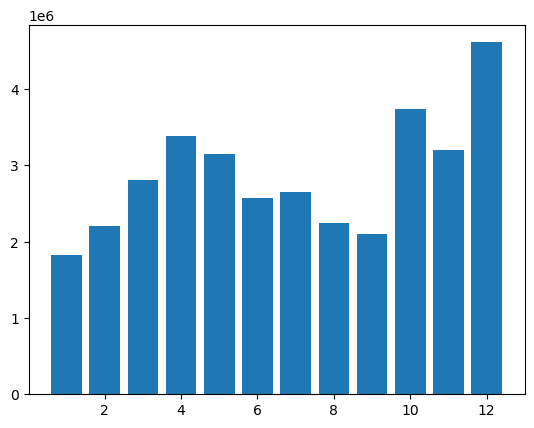

In [58]:
months = range(1,13)

plt.bar(months, results)

In [59]:
data['Purchase Address'].value_counts()

193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
716 5th St, San Francisco, CA 94016       7
550 Cherry St, San Francisco, CA 94016    7
                                         ..
339 Forest St, San Francisco, CA 94016    1
344 2nd St, Austin, TX 73301              1
75 Lincoln St, San Francisco, CA 94016    1
675 Cherry St, Atlanta, GA 30301          1
209 11th St, Atlanta, GA 30301            1
Name: Purchase Address, Length: 140787, dtype: int64